In [1]:
%load_ext heat

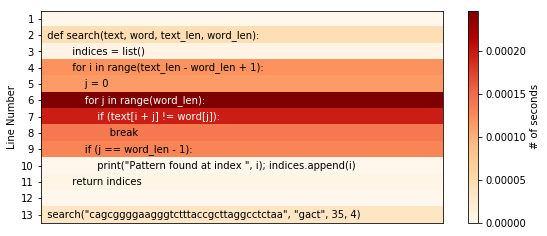

In [4]:
%%heat

def search(text, word, text_len, word_len): 
        indices = list()
        for i in range(text_len - word_len + 1): 
            j = 0
            for j in range(word_len): 
                if (text[i + j] != word[j]): 
                    break
            if (j == word_len - 1):  
                print("Pattern found at index ", i); indices.append(i)
        return indices
    
search("cagcggggaagggtctttaccgcttaggcctctaa", "gact", 35, 4)

In [9]:
%%heat -o kmp-heat.png
class KMP(object):
	def __init__(self, pattern, text):
		self.pat = pattern; self.txt = text
		self.M = len(pattern); self.N = len(text)
		self.matches = list()

	def KMPSearch(self): 
		j = 0 # index counter for pattern 
		lps = self.computeLPSArray() # build the longest prefix table 
		i = 0 # index counter for text
		while i < self.N: # iterating throught the text
			if self.pat[j] == self.txt[i]: # when there's a character match
				i += 1
				j += 1

			if j == self.M: 
				# print("Found pattern at index " + str(i-j))
				self.matches.append((i - j))
				j = lps[j - 1] 

			elif i < self.N and self.pat[j] != self.txt[i]: # mismatch after j matches
				# Do not match lps[0..lps[j-1]] characters, 
				# they will match anyway 
				if j != 0: 
					j = lps[j-1] 
				else: 
					i += 1
		return self.matches

	def computeLPSArray(self):
        
		lps = [0] * self.M
		l = 0 # length of the previous longest prefix suffix 
		lps[0] # lps[0] is always 0 
		i = 1

		# the loop calculates lps[i] for i = 1 to M-1 
		while i < self.M: 
			if self.pat[i]== self.pat[l]: 
				l += 1
				lps[i] = l
				i += 1
			else: 
				# This is tricky. Consider the example. 
				# AAACAAAA and i = 7. The idea is similar 
				# to search step. 
				if l != 0: 
					l = lps[l - 1] 
				else: 
					lps[i] = 0
					i += 1
		return lps


def main():
    txt = "cagcggggaagggtctttaccgcttaggcctctaa"; pat = "tttacc"
    kmp = KMP(pat, txt)
    print(kmp.KMPSearch())
    
main()

[15]


In [5]:
%%heat -o bm-heat.png

class BoyerMoore(object):


	def __init__(self):
		self.NO_OF_CHARS = 256
		self.matches = list()


	def badCharHeuristic(self, string, size): 
		''' 
		The preprocessing function for 
		Boyer Moore's bad character heuristic 
		'''

		# Initialize all occurence as -1 
		badChar = [-1] * self.NO_OF_CHARS 

		# Fill the actual value of last occurence 
		for i in range(size): 
			badChar[ord(string[i])] = i; 

		# retun initialized list 
		return badChar 

	def search(self, txt, pat):
		m = len(pat) 
		n = len(txt) 

		# create the bad character list by calling 
		# the preprocessing function badCharHeuristic() 
		# for given pattern 
		badChar = self.badCharHeuristic(pat, m) 

		# s is shift of the pattern with respect to text 
		s = 0
		while(s <= n - m): 
			j = m - 1
			while j >= 0 and pat[j] == txt[s + j]: 
				j -= 1
			# If the pattern is present at current shift, 
			# then index j will become -1 after the above loop 
			if j < 0: 
				self.matches.append(s)
				s += (m - badChar[ord(txt[s + m])] if s + m < n else 1) 
			else: 
				s += max(1, j - badChar[ord(txt[s+j])]) 
		return self.matches


# Driver program to test above funtion 
def main(): 
	txt = "ABAAABCDABC"
	pat = "ABC"
	bm = BoyerMoore()
	print(bm.search(txt, pat))

if __name__ == '__main__': 
	main()

[4, 8]
